# 1. Machine Learning

- Supervised Learning :지도 학습 -> knn, 선형회귀, 로지스틱 회귀, SVM, DT/RandomForest, Neural Network
- Unsupervised Learning : 비지도학습 -> 군집(K-Means, 계층분석, 기대값최소), 차원축소(PCA,t-SNE), 기타 연관성
- Reinforcement Learning : 강화학습

- 지도 학습: 가격예측, 어떤 예측할 때
- 비지도 학습: 군집, 주로 묶어줄때(정답이 없이 군집으로 나눔), 차원축소(정답이 없다.), 연관성 분석(basket 분석: 상품간에 관계성, 단어간의 관계성)

## Supervised Learning
    - 어떤 입력(특징)에 대해서 어떠한 결과(target, label)가 나와야 하는지에 대한 데이터셋을 가지고, 특정 입력에 대한 특정 출력이 나오게 하는 규칙을 찾는 것
    - 입력과 출력으로 구성되는 학습데이터(training data)에 의해 입력으로부터 출력을 끌어내는 규칙(Rule)을 발견하는 것

컬럼중에 특정한 컬럼(정답지, label)을 분리해서 생각, 이것을 train data와 같이 Predictive Model에 집어넣어 기계학습 시키면  
새로운 데이터가 들어왔을 때 어떠한 결과값을 놓을 것인지 보는 것이다.

정답이 존재    
#### regression 평가 방법
- #### RMSE(Root Mean Squared Error)
- MAPE(Mean Absolut Percentage Error)
- MASE(Mean Absolute Squared Error)

## Unsupervised Learning

정답지가 없다.(**Label이 없다.**)  
그래서 분류를 할 때 지도학습은 label 라인을 기준으로 나누기라도 할 수 있지만 비지도학습은 임의로 나눌수가 있다.  
그래서 딱 맞아 떨어지지 않는 경우가 많다고 할 수 있다.

**차원축소**: 15개 변수중에서 내가 생각한 결과에 가장 영향을 많이 주는 변수로 축소하는 것

특징 X.... / 결과 Y 순으로 data칼럼이 배치

Train / Test로 분리 --> 여러가지 알고리즘을 통해 학습을 시킬 때 Train을 이용  
test데이터는 모델결과를 테스트할 때 사용

## scikit-learn 소개
- machine learning 오픈 소스 라이브러리, 구글 썸머 코드에서 처음 구현
- 다른 라이브러리와 호환성이 상당히 좋다. 내적으로는 통일된 인터페이스를 가지고 있어서 처리하는 과정에서 좀 힘들 수 있음

### Deep Learning
NLP, 영상 / data가 기본적으로 많아야 한다.  
해석(?): 해석이 힘들다. / 모델-성능개선, 이쪽으로는 활발히 이루어지고 있다.  


# knn (K Nearest Neighbor)

knn은 train의 인접 데이터를 보고 
- 분류에 대해서는 다수결로 처리
- 숫자에 대해서는 평균으로 처리  

그래서 Regression도 가능은 하다.  

거리와 개수로 판단, 개수로 판단해서 해당 범위 안에 어떠한 데이터 분포가 가장 높으면 새로운 데이터를 그 데이터로 인식

knn은 선형이 될 수 없다.(비선형)  
하지만 knn도 regression이 가능하다.

### knn parameter
- **k : 몇개 근접한 것을 쓸 것인가**  
小: 너무 작으면 overfiiting 위험(너무 디테일하게 반영) (bias가 적어지고, variance가 높아짐)
多: 너무 크면 underfitting 위험(너무 두리뭉실 반영, 오류가 많아질 수 있다. (bias가 커지고, variance가 낮아짐)  
보통은 cv를 돌려서 가장 적은 에러값이 나온 k를 사용 (최적의 k를 찾아야 한다.)  

![image](https://user-images.githubusercontent.com/41675375/72858870-7c6efa00-3d05-11ea-8bec-6749a5a22fa0.png)
유클리드 공간에서의 노름(p차원)  
유클리드 거리(어떠한 차원이든 a점과 b점사이에 일직선을 그은 거리)  

- **Weighted knn**  
가까이 있는 것에 더 높은 가중치를 부여, 다른 것과 차별을 두는 것  
거리에 대한 역수로 계산  
scikit-learn (sklearn.neighbors) : neighbors.KNeighborsClassifier

In [19]:
# 계속 바뀔 수가 있다.
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata

from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pylab as plt

In [2]:
mnist = fetch_mldata("MNIST original")
mnist
# target이 목표, 결과값
# data는 sample data : 필기체에 대해서 픽셀화시킨 것을 2차원 어레이로 표현했는데 -> 1차원 리스트로 표현
# dtype=uint8 0 ~ 255까지 표현가능(진한 정도)

C:\Users\1-17\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\1-17\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [6]:
mnist = fetch_mldata('MNIST original')
# test_size: 25%는 test로 나머지는 train 7:3 / 8:2
# target과 data를 같이 넣어준다.
# random_state: seed 번호 -> 이걸안해주면 돌릴때마다 결과값이 달라질 수 있다. (random으로 선택했을때 문제 없게하기 위해)
(train_data, test_data, train_labels,test_labels)= train_test_split(np.array(mnist.data),
                                                                    mnist.target, 
                                                                    test_size=0.25, 
                                                                    random_state=1234)
# 모의고사 문제지, 모의고사 정답지, 실전 문제지, 실전 정답지 4set로 나오게 된다.
print(len(train_data))
print(len(test_data))
# train : 52500
# tset : 17500
# 3 : 1 비율로

52500
17500


C:\Users\1-17\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\1-17\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


## 0~9까지 데이터가 다 들어있는지 확인!
- 실제로 우리가 학습 시킬 데이터가 0~9까지 다 제대로 들어있는 데이터인지 확인

데이터 확인을 위해서 **unique()** 메서드를 자주 이용

In [7]:
print(np.unique(train_labels))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [12]:
# Method. 01) numpy의 unique이용해서 처리
# 02) 패키지이용방법은 없어질 것이니 numpy 이용해서 확인하자
unique, counts = np.unique(train_labels, return_counts=True)
print(np.asarray((unique, counts)).T)
# 정답지가 무엇이 있고 데이터가 어떻게 분포되어 있는지 보기 위함

[[0.000e+00 5.166e+03]
 [1.000e+00 5.894e+03]
 [2.000e+00 5.282e+03]
 [3.000e+00 5.280e+03]
 [4.000e+00 5.131e+03]
 [5.000e+00 4.743e+03]
 [6.000e+00 5.171e+03]
 [7.000e+00 5.502e+03]
 [8.000e+00 5.154e+03]
 [9.000e+00 5.177e+03]]


## 실제 데이터 값을 이미지로 확인해보자
참고) http://yann.lecun.com/exdb/mnist  
위 사이트에 들어가서 실제 데이터의 구성을 확인해보자, 실제 내용을 보면 원래 데이터는 28 X 28 크기 이미지로 이루어진 것을 알 수 있다. 다만 우리가 받아들이고 데이터화 하는 과정에서 label이 부여되었고 처리를 위해서 matrix가 아닌 28x28 크기의 1차원 어레이로 처리가 된 것을 볼 수 있다.  
시각화부분) http://seaborn.pydata.org/generated/seaborn.heatmap.html


In [13]:
import seaborn as sns

In [15]:
# 28 X 28 = 784
# 784개로 이루어진 픽셀로 구성, 이것을 일차원 어레이 처리가 되어있는데 28x28 이미지로 show
print(train_data[0].shape)
print(np.sqrt(train_data[0].shape[0]))

(784,)
28.0


Text(0.5, 1, 'MNIST Digit Image _ Train Data Number1000')

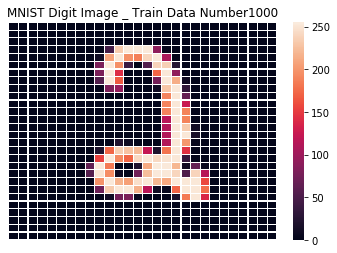

In [34]:
# 보고자 하는 데이터의 index
idx = 1000
image_data = train_data[idx]

# 1차원이기 때문에 실제값을 계산하기 위해서는 1차원의 길이값 획득  & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
# 28 x 28 로 변환하는 작업
sns.heatmap(np.reshape(image_data, (one_size, one_size)), linewidth=0.1, xticklabels=False, yticklabels=False)
plt.title(str("MNIST Digit Image _ Train Data Number") + str(idx))

Text(0.5, 1, 'MNIST Digit Image _ Train Data Number3000')

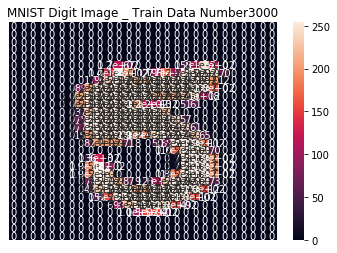

In [33]:
sns.heatmap(np.reshape(image_data, (one_size, one_size)), linewidth=0, xticklabels=False, yticklabels=False, annot=True)
plt.title(str("MNIST Digit Image _ Train Data Number") + str(idx))

## Normalization - Max / Min method
- new x = (x - x_min) / (x_max - x_min)
```python
from sklearn.preprocessing import MinMaxScaler
```

In [35]:
from sklearn.preprocessing import MinMaxScaler

#### 데이터 튜닝

In [ ]:
# 정답지에 대해서는 변하는 것이 없고 data에 대해 값을 변경한다.
# data를 check해서 정해진 룰에 따라 변형(fitting)시키는것 : fit_transform()
# train을 하면 test도 수정해야 한다. (중요 체크) 
min_max_scaler - MinMaxScaler()
train_norm = min_max_scaler.fit_transform(train_data)
test_norm = min_max_scaler.fit_transform(test_data)

# 참고로 기존에는 0 ~ 255 까지의 unit8 기반이었는데, minmax를 하게 되면은 값이 0 ~ 255가 

## 기본 분석 시작
- 참고로 데이터의 수가 많기 때문에 한 번 수행하는데 시간이 상당히 소요되니, 시간에 대한 부분을 잘 생각을 할 것
- 참고) n_jobs : int, optional(default = 1), 기본값으로 코어 1개로만 돌린다.
> -1로 설정하면 컴퓨터에 맞게 최적화된 코어 개수로 돌리게 된다.

In [37]:
import time
from sklearn.neighbors import KNeighborsClassifier
# 평가하기 위해
from sklearn.metrics import accuracy_score
# bias는 낮아지지만 variance는 높아지는 과적합 오류를 줄이기 위해
from sklearn.model_selection import cross_val_score

#### 지도 학습(Supervised Learning)

In [39]:
t1 = time.time()
# instantiate learning model ( k = 3)
# n_jobs = -1 하지 않으면, 시간이 많이 걸리게 된다. 실제에서 사용할 때에는 시간도 상당히 오래 걸린다.
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
# 여기까지는 KNN을 사용하기 위한 세팅만 한 것
# 여기서 최적의 parameter를 찾는 것 (train data와 train 정답지가 필요)

# fitting the model (모델 학습시키기)
knn.fit(train_data, train_labels)

# predict the response (문제 푼 답, 예측치)
pred = knn.predict(test_data)

# 캐글에서는 나온 예측치를 올리면 채점을 해줌, 그래서 하루에 채점을 할 수 있는 텀을 줘서 제출자들이 정답지에 대해 추정을 못하도록 막아둠
# 여기서는 우리가 직접 채점

t2 = time.time()
print("Process Time : " + str(t2-t1))

# evaluate accuracy
print(accuracy_score(test_labels, pred))


# 시간이 좀 많이 걸린다

Process Time : 183.41497039794922
0.9718857142857142


The optimal number of neighbors is 3


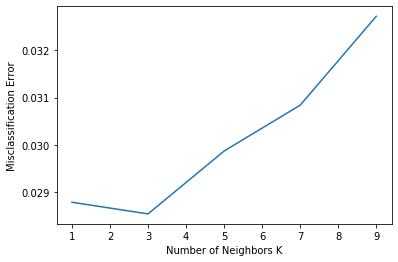

Process Time : 0.08381462097167969


In [75]:
# k가 몇개일때가 가장 좋은지를 알기 위한 과정
t1 = time.time()
myList = list(range(1,10))

# 동률이 없게 홀수로 돌리는 것이 좋다.
neighbors = list(filter(lambda x : x % 2  != 0, myList))

# empty list that will hold cv scores
# k 돌때마다 각각 어떠한 성능결과가 나왔는지 저장하기 위해 빈 리스트 생성
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    # 모델 준비 (홀수로 k를 설정)
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    # cross_val_score안에 모델을 넣고, 학습할 데이터의 문제, 정답을 넣는다. 
    # (52500개 train data를 10 등분해서, 10개에서 9개는 연습, 1개는 실전 이런식으로 돌아간다.)
    # scoring: 무엇을 평가할지에 대한 기준 제시 / accuracy: 얼마나 많이 맞췄는지 비율 제시
    # 52500개를 10등분해서 학습하고 문제 풀고, 학습하고 문제 풀고를 반복
    scores = cross_val_score(knn, train_data, train_labels, cv=10, scoring='accuracy')
    # 10번을 돌렸을 때 accuracy 값들에 대한 평균치를 저장
    cv_scores.append(scores.mean())
    print(scores.mean())
    
# changing to misclassification error
# 앞에서는 정확도 관점, 여기는 에러관점에서 보는 것
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
# neighbors 개수에 따라 MSE가 어떻게 분포하는지 그래프로 보여줌
plt.plot(neighbors, MSE)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

t2 = time.time()
print("Process Time : " + str(t2-t1))

위 그래프에서 에러가 내려가다가 다시 올라간다. 그래서 어디가 제일 에러가 작은지를 찾아내는 것

## with PCA

In [42]:
from sklearn.decomposition import PCA

In [43]:
# 784개 성분중에서 메인으로 변동성 비중을 차지하는 40개를 추려서 뽑는 것
# Variance 큰 데이터들을 가지고 40개를 뽑아준다.
# 40개인지 몇개가 적당한지는 알아봐야한다.
num_comp = 40
pca = PCA(n_components=num_comp)

In [44]:
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [45]:
# determine amount of variance explained by components
np.sum(pca.explained_variance_ratio_)

0.7869749882592443

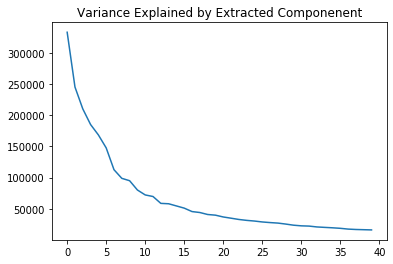

In [50]:
# plot the explained variance
plt.plot(pca.explained_variance_)
plt.title("Variance Explained by Extracted Componenent")
plt.show()

In [51]:
# extract the features
# train에 대해서 피팅 작업, 
train_ext = pca.fit_transform(train_data)
print(train_ext.shape)

(52500, 40)


In [52]:
# transform the test data using the existing parameters
# train을 하면 test에 대해서도 피팅작업
test_ext = pca.transform(test_data)
print(test_ext.shape)

(17500, 40)


In [55]:
min_max_scaler = MinMaxScaler()

In [56]:
train_norm = min_max_scaler.fit_transform(train_ext)
test_norm = min_max_scaler.fit_transform(test_ext)

In [57]:
knn = KNeighborsClassifier()
knn.fit(train_norm, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
#from sklearn.model_selection import cross_validation
#from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [59]:
# 시간 오래걸림..
cross_val_score(knn, train_norm, train_labels, cv=5)
# 일종의 검증표 (확인하는 수단)

array([0.97248929, 0.97124357, 0.97114011, 0.97275672, 0.96979802])

- 위의 기본 세팅에서도 거의 97%의 결과가 나타났는데, PCA로 성분을 줄이면 오히려 더 좋은 성능이나, 적은 데이터로 유사한 성능을 확보할 수 있다.  
- 이와 같은 방법을 주로 사용하는 이유는 knn은 상당히 심플하면서도 성능이 좋은 알고리즘인데, 문제를 차원의 저주에 걸리면 상당한 성능저하를 야기하고 있다. 그래서 기본적으로 많은 사람들이 PCA나 DT등 여러가지 방법을 활용하여서 차원 축소를 하고 적용

## 분류 모델 평가 confusion matrix

![image](https://user-images.githubusercontent.com/41675375/72856914-5cd4d300-3cff-11ea-880f-cb5afcf76a53.png)

![image](https://user-images.githubusercontent.com/41675375/72856814-09628500-3cff-11ea-917d-7cb8ec7dff37.png)

- Precision : TP / (TP + FP)
- Recall : TP / (TP + FN) -> 암 진단을 생각, 암은 실제 발병한 것을 정확히 진단하는 것이 중요